In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


In [46]:
data=pd.read_csv('delivery_time.csv')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [48]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<ipython-input-49-fd8df65c5d1c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

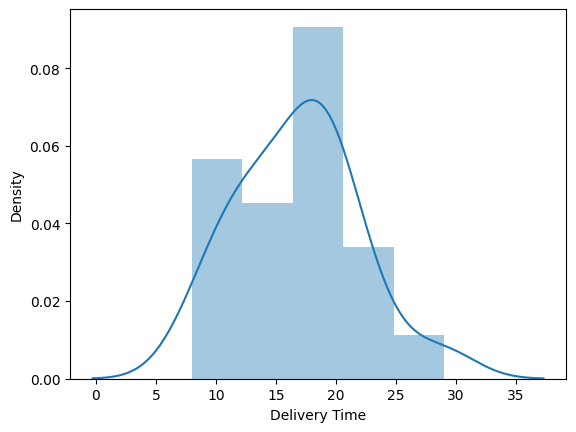

In [49]:
sns.distplot(data['Delivery Time'])

<ipython-input-50-971e7a7bfcf0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

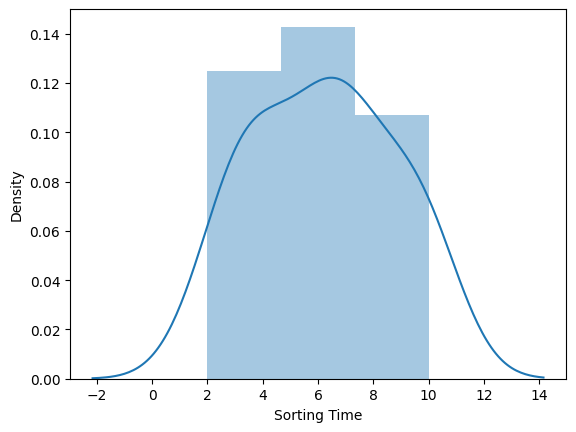

In [50]:
sns.distplot(data['Sorting Time'])

In [51]:
dataset=data.rename({'Delivery Time':'delivery_time' ,'Sorting Time':'sorting_time'},axis=1)

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

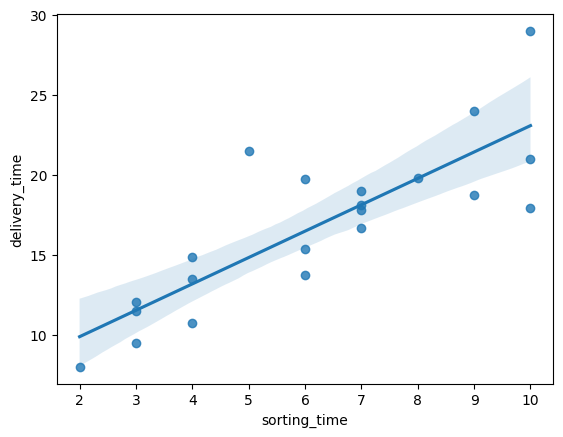

In [52]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

In [53]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           3.98e-06
Time:                        06:30:06   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
pred=model.predict(dataset["sorting_time"])

In [56]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [57]:
rmse = np.sqrt(np.mean((np.array(dataset["delivery_time"])-np.array(pred))**2))
rmse

2.7916503270617654

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

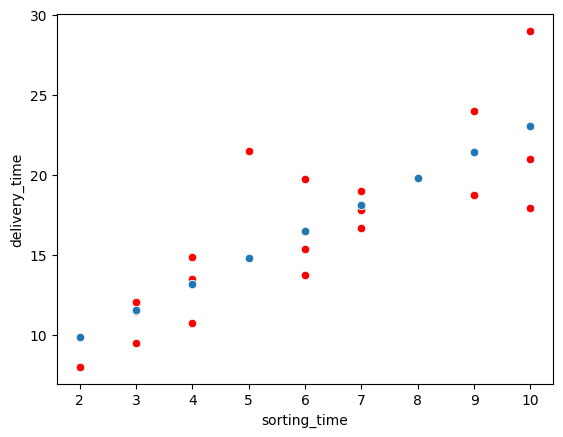

In [58]:
sns.scatterplot(x="sorting_time",y="delivery_time",data=dataset,color="red")
sns.scatterplot(x="sorting_time",y=pred,data=dataset)

In [59]:
model2 = smf.ols("delivery_time~np.log(sorting_time)",data = dataset).fit()

In [60]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           2.64e-06
Time:                        06:30:06   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
pred2 = model2.predict(dataset["sorting_time"])


In [62]:
rmse2 = np.sqrt(np.mean((np.array(dataset["delivery_time"])-np.array(pred2))**2))
rmse2

2.733171476682066

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

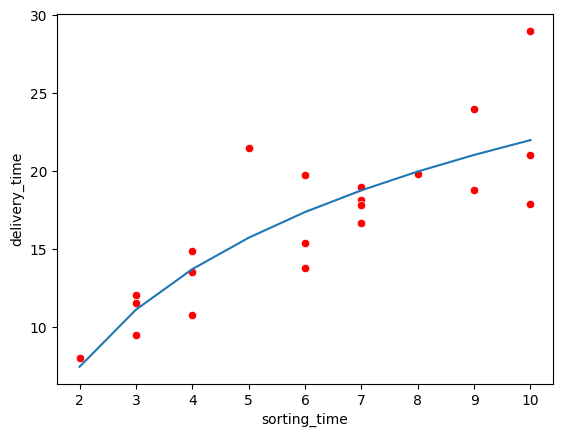

In [63]:
sns.scatterplot(x="sorting_time",y="delivery_time",data=dataset,color="red")
sns.lineplot(x="sorting_time",y=pred2,data=dataset)

In [64]:
model3 = smf.ols("np.log(delivery_time)~sorting_time",data = dataset).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Mon, 25 Sep 2023   Prob (F-statistic):           1.59e-06
Time:                           06:30:07   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
pred3= model3.predict(dataset["sorting_time"])

In [66]:
pred3=np.exp(pred3)

In [67]:
rmse3 = np.sqrt(np.mean((np.array(dataset["delivery_time"])-np.array(pred3))**2))
rmse3

2.9402503230562007

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

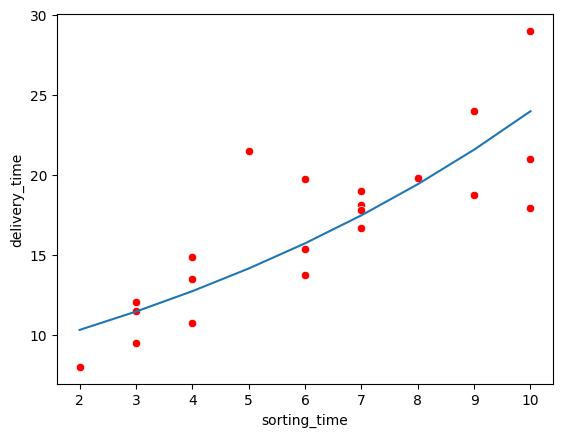

In [68]:
sns.scatterplot(x="sorting_time",y="delivery_time",data=dataset,color="red")
sns.lineplot(x="sorting_time",y=pred3,data=dataset)

In [69]:
model.rsquared

0.6822714748417231

In [70]:
model.rsquared_adj

0.6655489208860244

In [71]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

<Axes: ylabel='Count'>

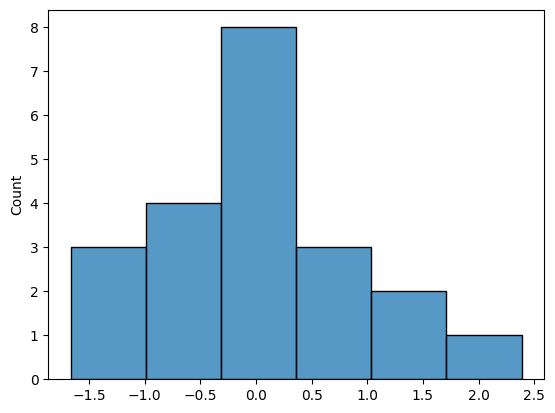

In [72]:
sns.histplot(model3.resid_pearson)

<Axes: >

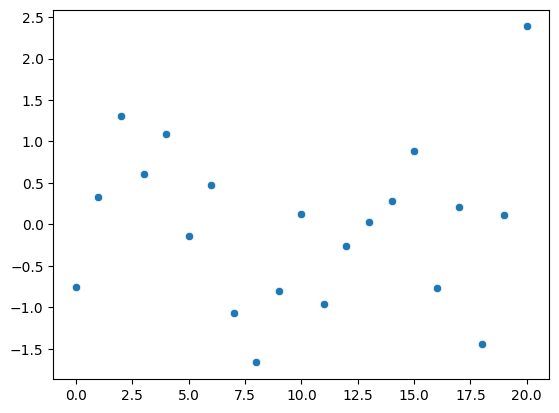

In [73]:
sns.scatterplot(model3.resid_pearson)